In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = r"C:\Users\LENOVO\Cohort-3.0-Machine-Learning-Assignments\data\US-pumpkins.csv"
df = pd.read_csv(path)


# Display the first few rows of the DataFrame
print(df.head())

# Display the data types of each column
print(df.dtypes)

print(df.shape)
print(df.columns)
df.head()

   City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0     

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


### Clean the Dataset

In [21]:
# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Drop rows with all NaNs in important columns
df = df.dropna(subset=['Variety', 'Low Price', 'High Price'], how='all')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# Fix Price columns
price_cols = ['Low Price', 'High Price', 'Mostly Low', 'Mostly High']
df[price_cols] = df[price_cols].apply(pd.to_numeric, errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City Name        1757 non-null   object        
 1   Type             45 non-null     object        
 2   Package          1757 non-null   object        
 3   Variety          1752 non-null   object        
 4   Sub Variety      296 non-null    object        
 5   Grade            0 non-null      float64       
 6   Date             1757 non-null   datetime64[ns]
 7   Low Price        1757 non-null   float64       
 8   High Price       1757 non-null   float64       
 9   Mostly Low       1654 non-null   float64       
 10  Mostly High      1654 non-null   float64       
 11  Origin           1754 non-null   object        
 12  Origin District  131 non-null    object        
 13  Item Size        1478 non-null   object        
 14  Color            1141 non-null   object 

### Feature Engineering

In [25]:
# Calculate average price

df['Average Price'] = df[['Low Price', 'High Price']].mean(axis=1)

# Extract month and year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Calculate average price
df['Average Price'] = df[['Low Price', 'High Price']].mean(axis=1)

# Extract month and year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

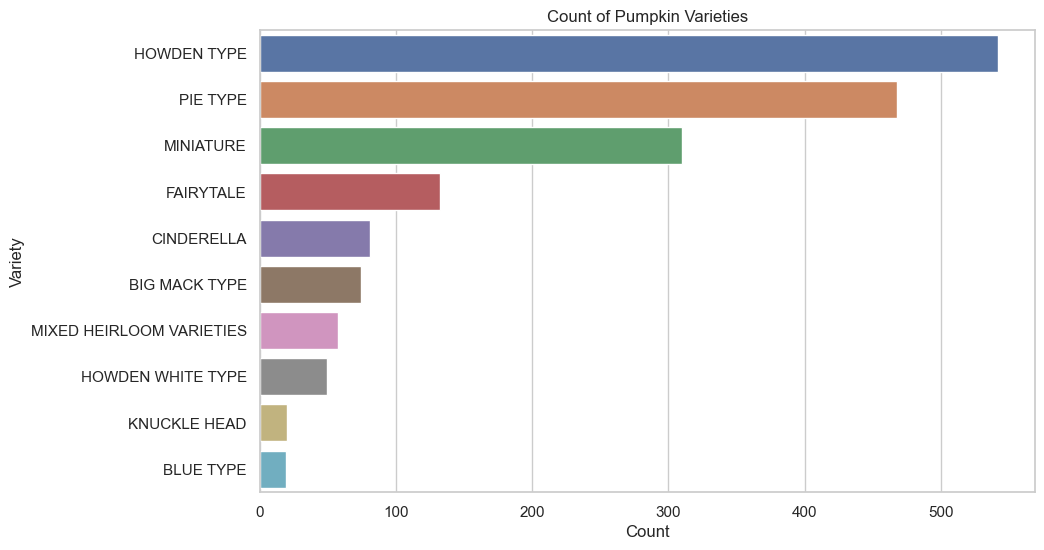

In [24]:
# Barplot of variety counts
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Variety', order=df['Variety'].value_counts().index)
plt.title('Count of Pumpkin Varieties')
plt.xlabel('Count')
plt.ylabel('Variety')
plt.show()



### Scatterplot of Price per Pond

In [16]:
# Clean and prepare the data
#df['price per Pond'] = df['price'] / df['Pond']
# Scatterplot of Price per Pond
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Pond', y='price per Pond', hue='Variety')
plt.title('Price per Pond by Variety')
plt.xlabel('Pond (in pounds)')
plt.ylabel('Price per Pond (in dollars)')
plt.legend(title='Variety')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Pond` for parameter `x`

<Figure size 1000x600 with 0 Axes>